First 5 rows of the dataset:
   survey_code  age  gender      height     weight        bmi  bmi_estimated  \
0            1   56    Male  173.416872  56.886640  18.915925      18.915925   
1            2   69  Female  163.207380  97.799859  36.716278      36.716278   
2            3   46    Male  177.281966  80.687562  25.673050      25.673050   
3            4   32  Female  172.101255  63.142868  21.318480      21.318480   
4            5   60  Female  163.608816  40.000000  14.943302      14.943302   

   bmi_scaled  bmi_corrected  waist_size  ...  sunlight_exposure  \
0   56.747776      18.989117   72.165130  ...               High   
1  110.148833      36.511417   85.598889  ...               High   
2   77.019151      25.587429   90.295030  ...               High   
3   63.955440      21.177109  100.504211  ...               High   
4   44.829907      14.844299   69.021150  ...               High   

   meals_per_day  caffeine_intake  family_history  pet_owner  \
0              5 

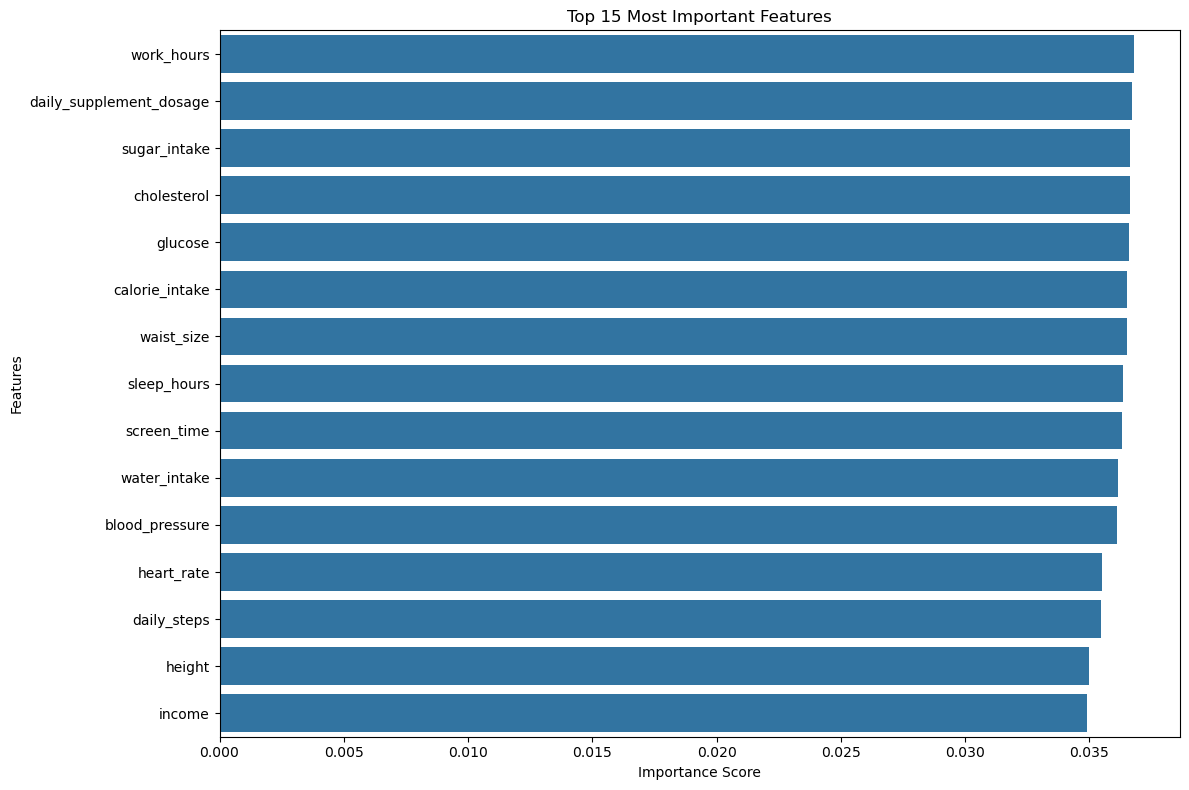

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the file path to your dataset
file_path = r"C:\Users\monik\health_lifestyle_classification.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# --- Initial Data Inspection ---
print("First 5 rows of the dataset:")
print(df.head())

print("\nNull value counts before cleaning:")
print(df.isnull().sum())


# --- Data Cleaning and Preparation ---

# Select all columns except 'survey_code' which is just an identifier
features_to_use = df.drop('survey_code', axis=1)

# Separate features and target
X_features = features_to_use.drop('target', axis=1)
Y_target = features_to_use['target']

# One-hot encode all categorical features
X_encoded = pd.get_dummies(X_features, drop_first=True)

# Impute missing values in the feature set
imputer = SimpleImputer(strategy='mean')
X_imputed_array = imputer.fit_transform(X_encoded)
X_imputed = pd.DataFrame(X_imputed_array, columns=X_encoded.columns)

# Encode the target variable
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y_target)


# --- Model Training and Evaluation ---

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y_encoded, test_size=0.2, random_state=42, stratify=Y_encoded)

# Scale the features
# While Random Forest doesn't strictly require scaling, it's good practice
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
# n_estimators is the number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print("\n--- Random Forest Model Evaluation ---")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nTest Confusion Matrix:")
print(conf_matrix)


# --- Feature Importance Visualization ---

# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = X_imputed.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(15) # Top 15 features

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
An accuracy of 70% is a good start, but there's definitely room for improvement. A great way to boost the performance of a Random Forest model is through hyperparameter tuning.

Right now, the model is using default settings (e.g., n_estimators=100). By systematically searching for a better combination of these settings, we can often find a more powerful and accurate model.

I've updated the Mod25_capstone_3 to use RandomizedSearchCV. This tool will automatically test many different combinations of hyperparameters using cross-validation to find the best ones for your specific dataset. It's a more advanced and robust way to train your model.

Here’s what I've changed:

Defined a Parameter Grid: I've set up a range of values for key Random Forest hyperparameters like the number of trees (n_estimators), the maximum depth of each tree (max_depth), and more.

Implemented RandomizedSearchCV: This will search through the parameter grid to find the best-performing model configuration.
